In [2]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Dataset
df = pd.read_csv('Indian_Kids_Screen_Time_Cleaned.csv')
sns.set_style("whitegrid")

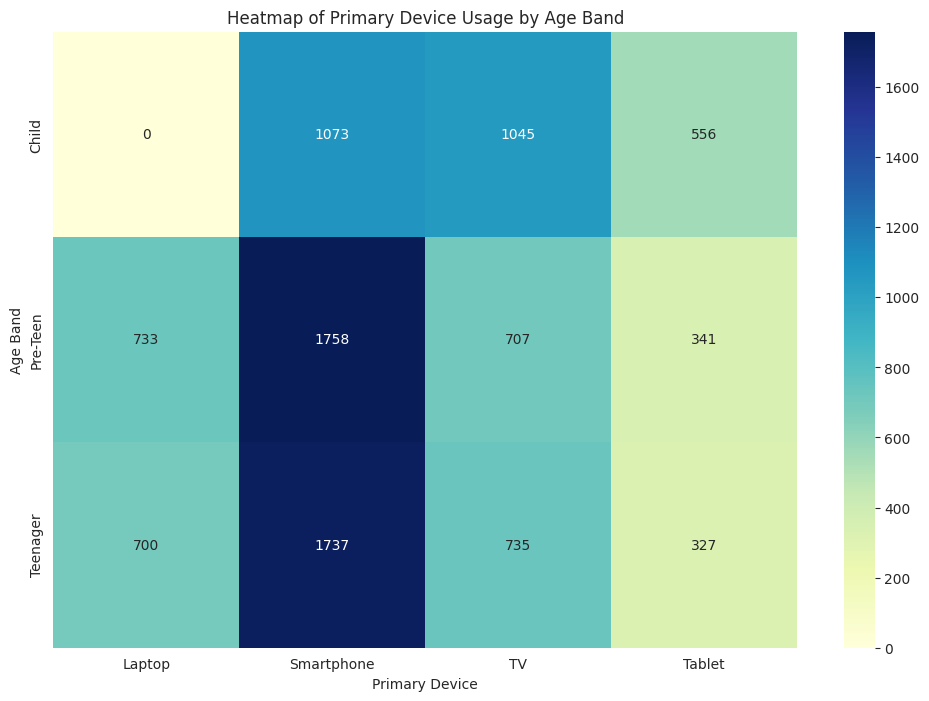

In [4]:
# Heatmap: Device Preference by Age Band
age_device_crosstab = pd.crosstab(df['Age_Band'], df['Primary_Device'])
plt.figure(figsize=(12, 8))
sns.heatmap(age_device_crosstab, annot=True, cmap='YlGnBu', fmt='g')
plt.title('Heatmap of Primary Device Usage by Age Band')
plt.ylabel('Age Band')
plt.xlabel('Primary Device')
plt.show()

# **Key Observations**
* Younger kids (Children) tend to use TVs the most. As they become Teenagers, they switch to using Smartphones much more.
* The chart clearly shows that Smartphones are the number one device for Teenagers.

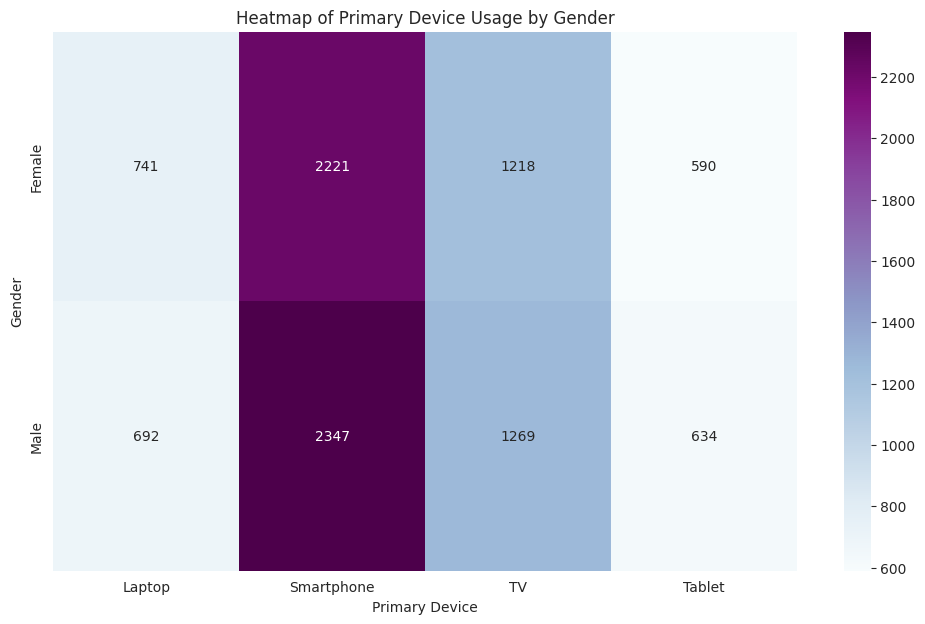

In [5]:
# Heatmap: Device Preference by Gender
gender_device_crosstab = pd.crosstab(df['Gender'], df['Primary_Device'])
plt.figure(figsize=(12, 7))
sns.heatmap(gender_device_crosstab, annot=True, cmap='BuPu', fmt='g')
plt.title('Heatmap of Primary Device Usage by Gender')
plt.ylabel('Gender')
plt.xlabel('Primary Device')
plt.show()

# **Key Observations**
* Both Male and Female use devices like Smartphones and TVs a lot.

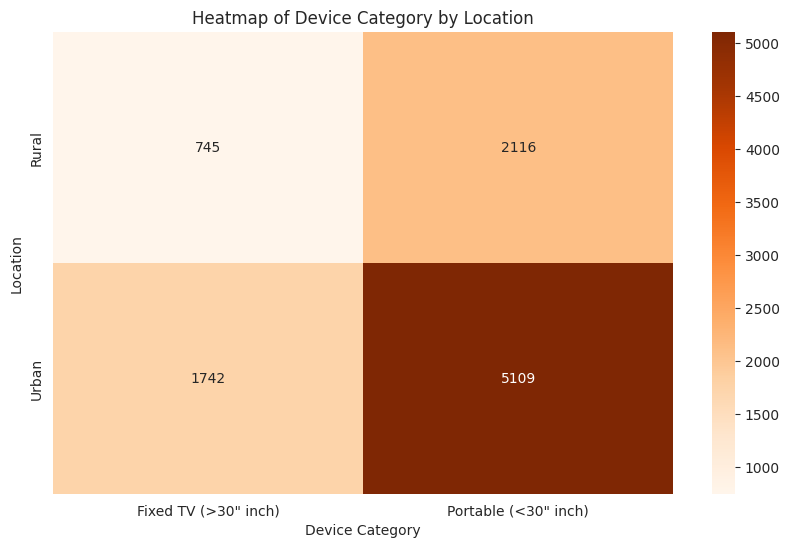

In [6]:
# Heatmap: Device Category by Location
location_device_cat_crosstab = pd.crosstab(df['Urban_or_Rural'], df['Device_Category'])
plt.figure(figsize=(10, 6))
sns.heatmap(location_device_cat_crosstab, annot=True, cmap='Oranges', fmt='g')
plt.title('Heatmap of Device Category by Location')
plt.ylabel('Location')
plt.xlabel('Device Category')
plt.show()

# **Key Observations**
* Kids in Urban areas tend to use more portable devices like phones and tablets.
* In Rural areas,Fixed TVs are more common.

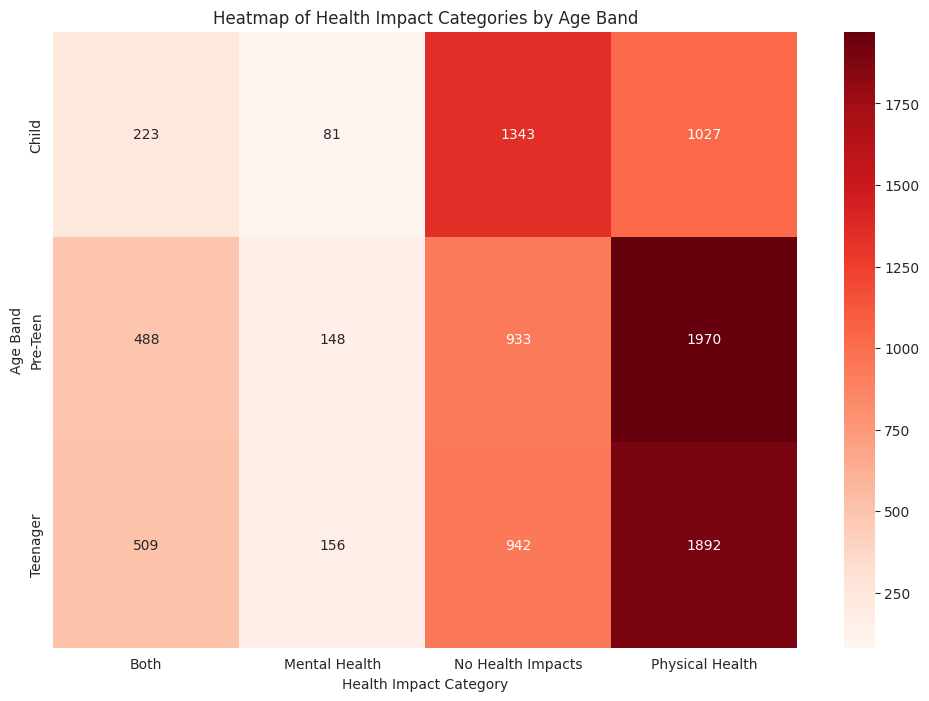

In [7]:
# Heatmap: Health Impacts by Age Band
age_health_crosstab = pd.crosstab(df['Age_Band'], df['Health_Impact_Category'])
plt.figure(figsize=(12, 8))
sns.heatmap(age_health_crosstab, annot=True, cmap='Reds', fmt='g')
plt.title('Heatmap of Health Impact Categories by Age Band')
plt.ylabel('Age Band')
plt.xlabel('Health Impact Category')
plt.show()

# **Key Observations**
* Physical issues like bad sleep or eye strain happen in all age groups. But mental issues like anxiety are seen most in Teenagers.
* Teenagers are the group most likely to suffer from both physical and mental health problems from screen time.

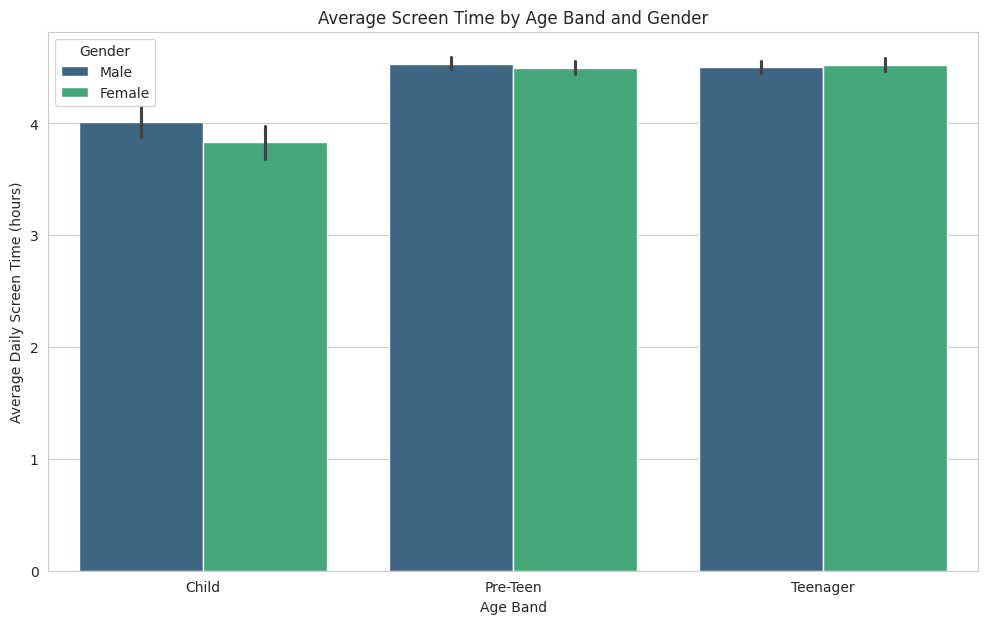

In [8]:
# Bar Chart: Screen Time by Age Band and Gender
plt.figure(figsize=(12, 7))
sns.barplot(x='Age_Band', y='Avg_Daily_Screen_Time_hr', hue='Gender', data=df, palette='viridis', order=['Child', 'Pre-Teen', 'Teenager'])
plt.title('Average Screen Time by Age Band and Gender')
plt.xlabel('Age Band')
plt.ylabel('Average Daily Screen Time (hours)')
plt.legend(title='Gender')
plt.show()

# **Key Observations**
* The bars get taller as kids get older, meaning they spend more hours on screens each day.
* In many cases, especially as they get older, the bar for boys is taller than the bar for girls.

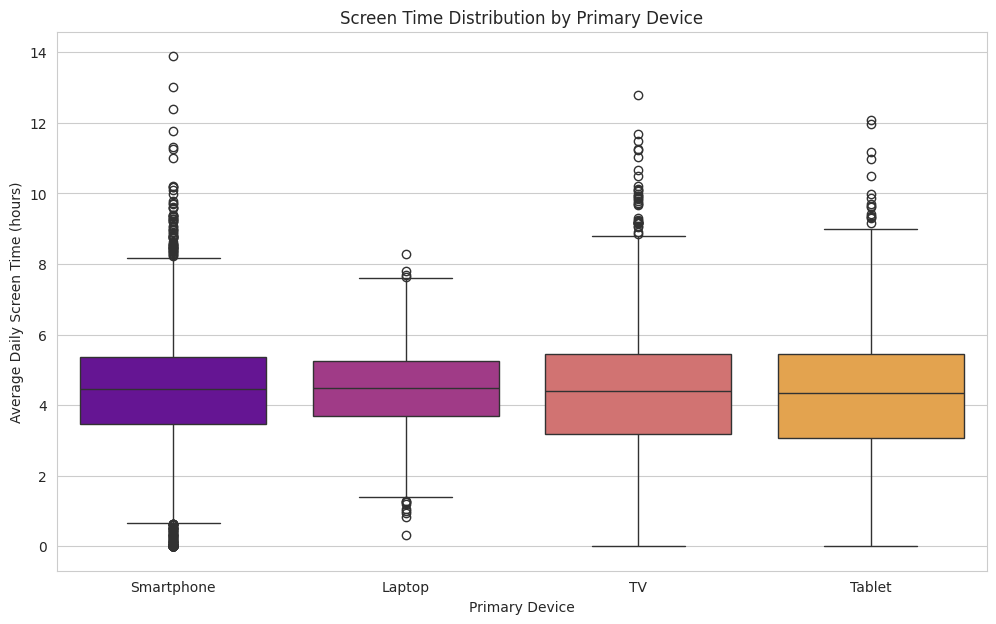

In [10]:
# Box Plot: Screen Time Distribution by Primary Device
plt.figure(figsize=(12, 7))
sns.boxplot(x='Primary_Device', y='Avg_Daily_Screen_Time_hr', data=df, hue='Primary_Device', palette='plasma', legend=False)
plt.title('Screen Time Distribution by Primary Device')
plt.xlabel('Primary Device')
plt.ylabel('Average Daily Screen Time (hours)')
plt.show()

# **Key Observations**
* Kids spend the most hours on devices like Smartphones.
* The box for Smartphones is very tall, which means some kids use it a little, but many use it for a very long time.



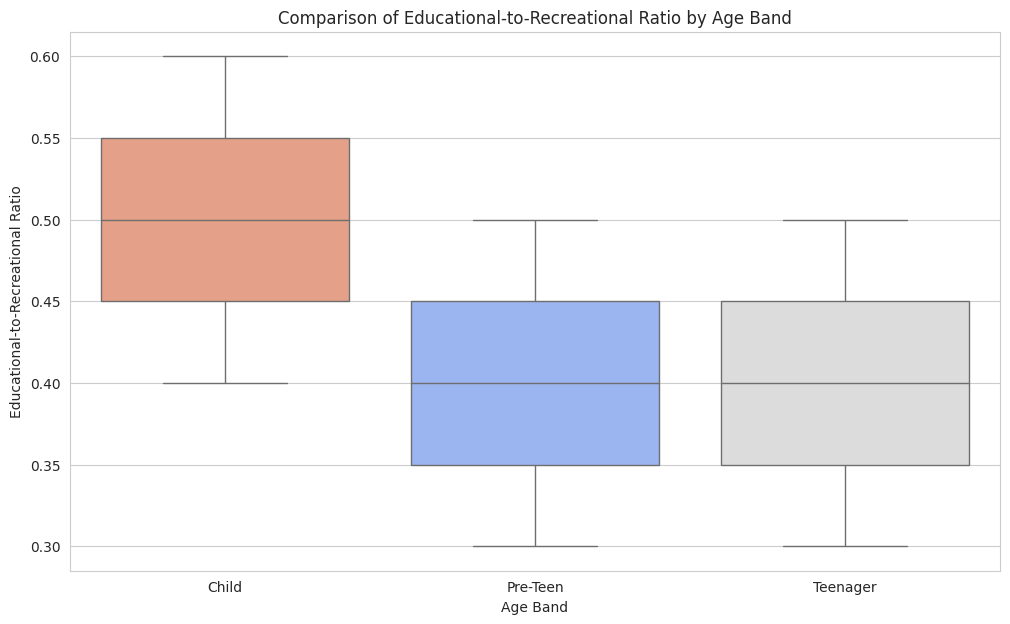

In [14]:
# Box Plot: Educational Ratio by Age Band
plt.figure(figsize=(12, 7))
sns.boxplot(x='Age_Band', y='Educational_to_Recreational_Ratio', data=df, hue='Age_Band', palette='coolwarm', order=['Child', 'Pre-Teen', 'Teenager'], legend=False)
plt.title('Comparison of Educational-to-Recreational Ratio by Age Band')
plt.xlabel('Age Band')
plt.ylabel('Educational-to-Recreational Ratio')
plt.show()

# **Key Observations**
* The line in the middle of the box (the average) is highest for the 'Child' group and lowest for the 'Teenager' group. This means learning content goes down as kids get older.
* The box for 'Teenagers' is positioned lower on the chart, showing that their screen time is much more focused on fun than on education compared to younger kids.

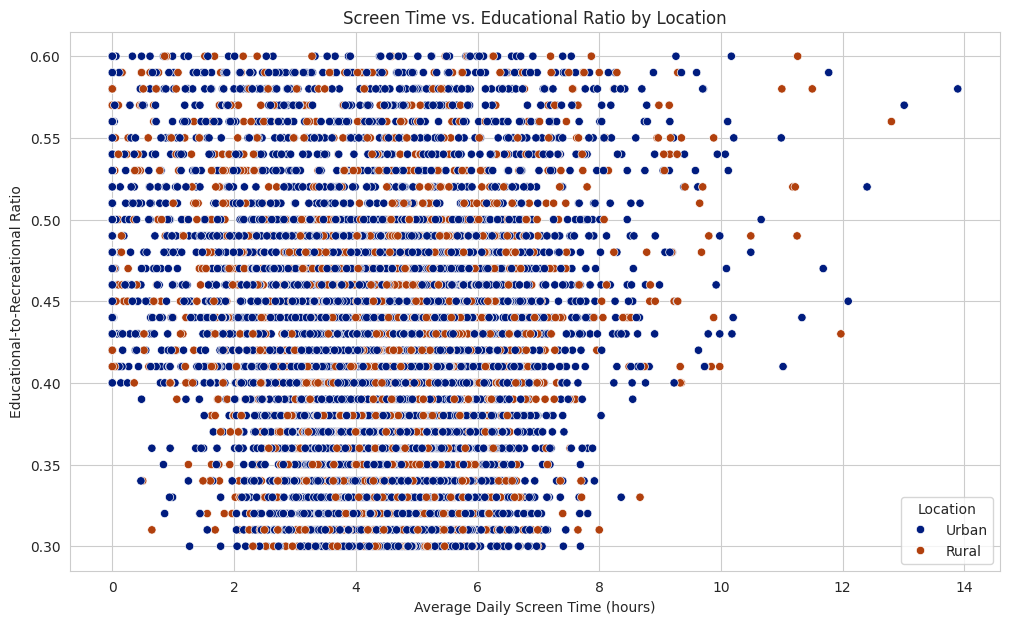

In [15]:
# Scatter Plot: Screen Time vs. Educational Ratio by Location
plt.figure(figsize=(12, 7))
sns.scatterplot(x='Avg_Daily_Screen_Time_hr', y='Educational_to_Recreational_Ratio', hue='Urban_or_Rural', data=df, palette='dark')
plt.title('Screen Time vs. Educational Ratio by Location')
plt.xlabel('Average Daily Screen Time (hours)')
plt.ylabel('Educational-to-Recreational Ratio')
plt.legend(title='Location')
plt.show()

# **Key Observations**
* The dots on the chart generally go from top-left to bottom-right. This means that the more hours a kid spends on a screen, the less educational that time is.
* This pattern is the same for kids in both Urban and Rural areas.

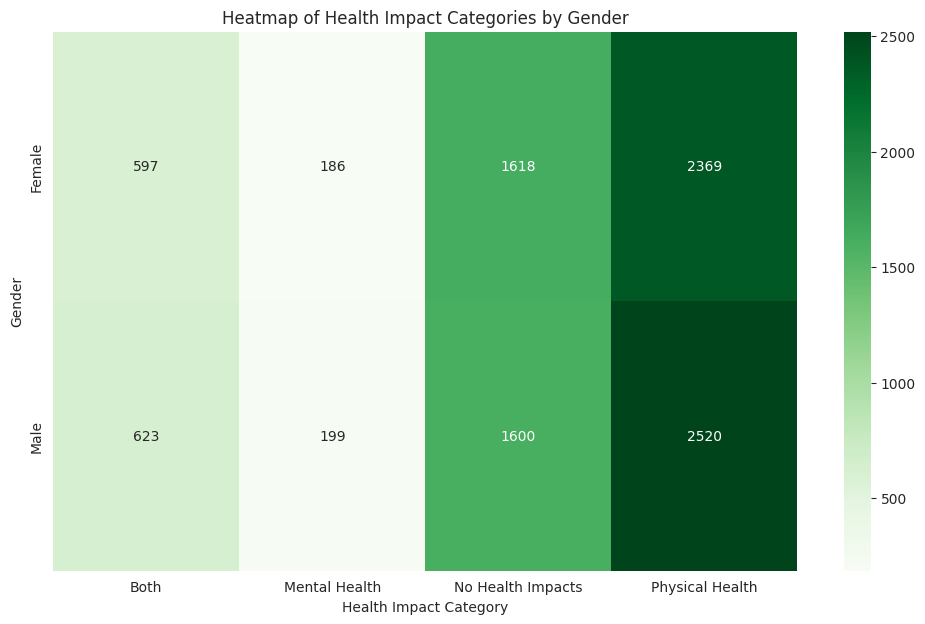

In [18]:
# Heatmap: Health Impacts by Gender
gender_health_crosstab = pd.crosstab(df['Gender'], df['Health_Impact_Category'])
plt.figure(figsize=(12, 7))
sns.heatmap(gender_health_crosstab, annot=True, cmap='Greens', fmt='g')
plt.title('Heatmap of Health Impact Categories by Gender')
plt.ylabel('Gender')
plt.xlabel('Health Impact Category')
plt.show()

# **Key Observations**
* The chart shows the number of males vs. females who report each type of health problem.
* By comparing the numbers in the cells, we can see which health impacts are more frequently reported by each gender. For example, we can compare the number of females reporting 'Mental Health' issues to the number of males reporting 'Mental Health' issues.
* We can also see the total number of individuals within each gender who reported any health impact versus no health impacts.

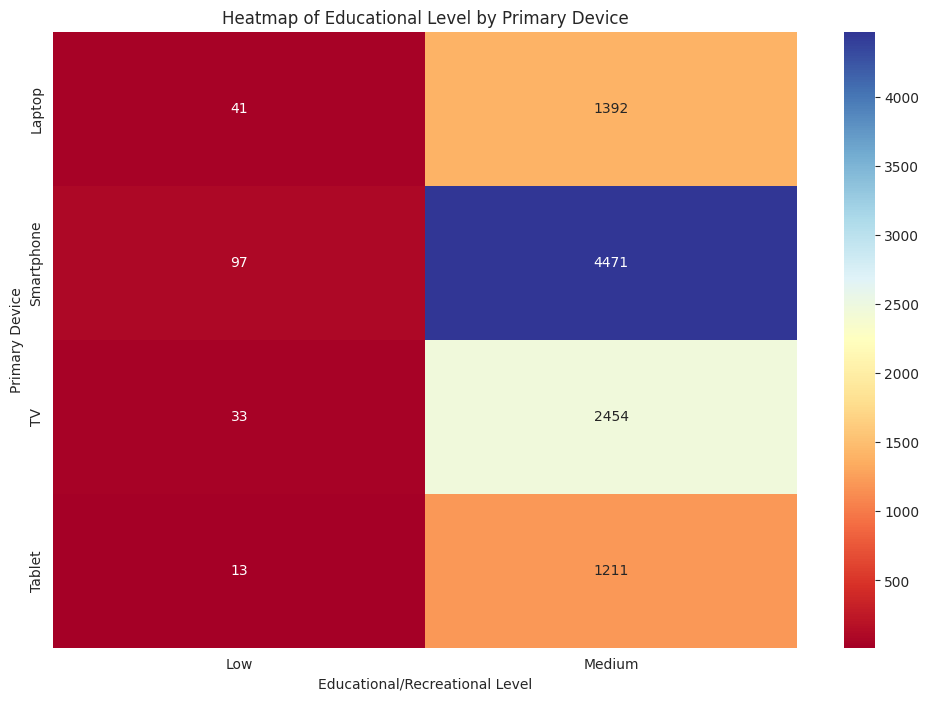

In [19]:
# Heatmap: Educational Level by Primary Device
device_edu_level_crosstab = pd.crosstab(df['Primary_Device'], df['Edu_Recreation_Level'])
plt.figure(figsize=(12, 8))
sns.heatmap(device_edu_level_crosstab, annot=True, cmap='RdYlBu', fmt='g')
plt.title('Heatmap of Educational Level by Primary Device')
plt.ylabel('Primary Device')
plt.xlabel('Educational/Recreational Level')
plt.show()

# **Key Observations**
* The heatmap displays the counts of individuals for each combination of 'Primary Device' and 'Educational/Recreational Level' (Low and Medium).
* By examining the numbers, we can observe which devices are more commonly associated with 'Low' or 'Medium' educational/recreational ratios.
* For instance, comparing the counts across devices for the 'Low' level can indicate which devices are used more for purely recreational purposes.
* Similarly, comparing counts for the 'Medium' level can show which devices are more balanced in terms of educational and recreational use.

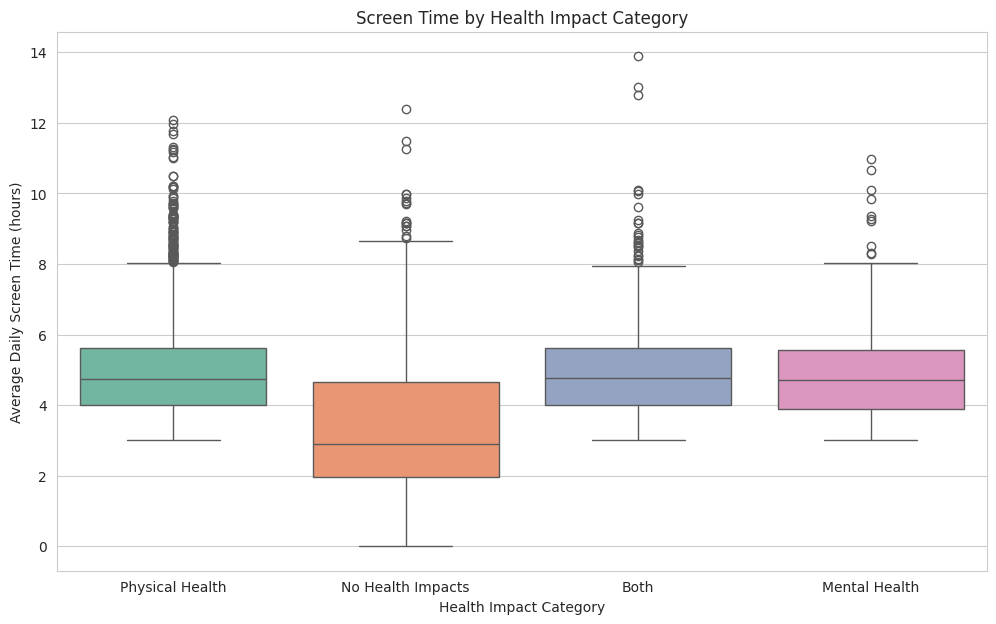

In [21]:
# Box Plot: Screen Time by Health Impact
plt.figure(figsize=(12, 7))
sns.boxplot(x='Health_Impact_Category', y='Avg_Daily_Screen_Time_hr', data=df, hue='Health_Impact_Category', palette='Set2', legend=False)
plt.title('Screen Time by Health Impact Category')
plt.xlabel('Health Impact Category')
plt.ylabel('Average Daily Screen Time (hours)')
plt.show()

# **Key Observations**
* The average screen time for kids with "No Health Impacts" is much lower than for kids with issues.
* Kids with the highest screen time are the ones who report having both physical and mental health issues.

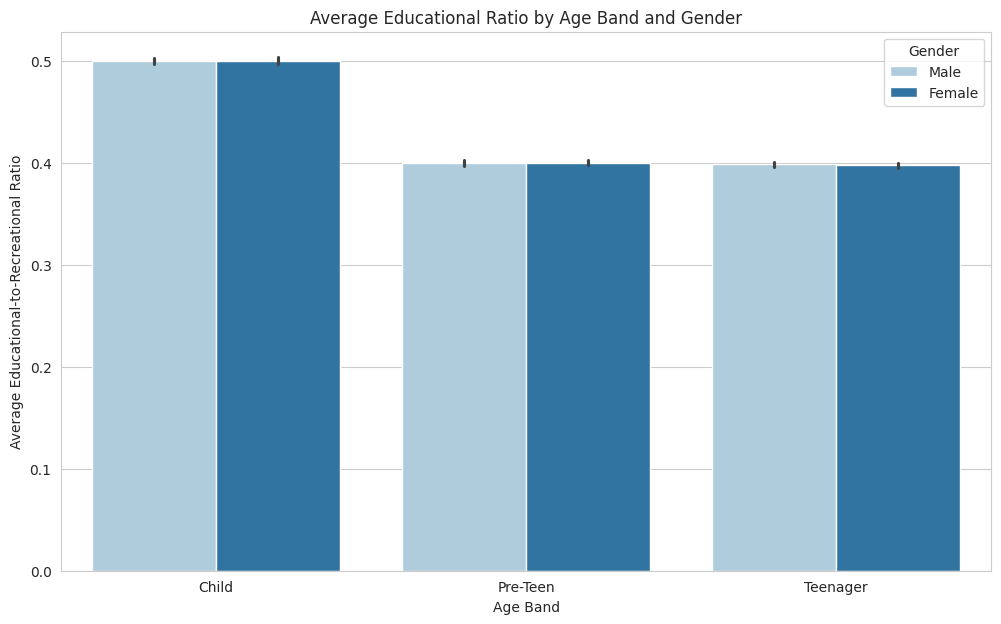

In [22]:
# Bar Chart: Educational Ratio by Gender and Age
plt.figure(figsize=(12, 7))
sns.barplot(x='Age_Band', y='Educational_to_Recreational_Ratio', hue='Gender', data=df, palette='Paired', order=['Child', 'Pre-Teen', 'Teenager'])
plt.title('Average Educational Ratio by Age Band and Gender')
plt.xlabel('Age Band')
plt.ylabel('Average Educational-to-Recreational Ratio')
plt.legend(title='Gender')
plt.show()

# **Key Observations**
* The average educational-to-recreational ratio decreases as age increases, meaning older kids (Teenagers) spend proportionally less screen time on educational content compared to younger kids (Children).
* The chart shows that across all age bands, the average educational-to-recreational ratio is similar for both genders.

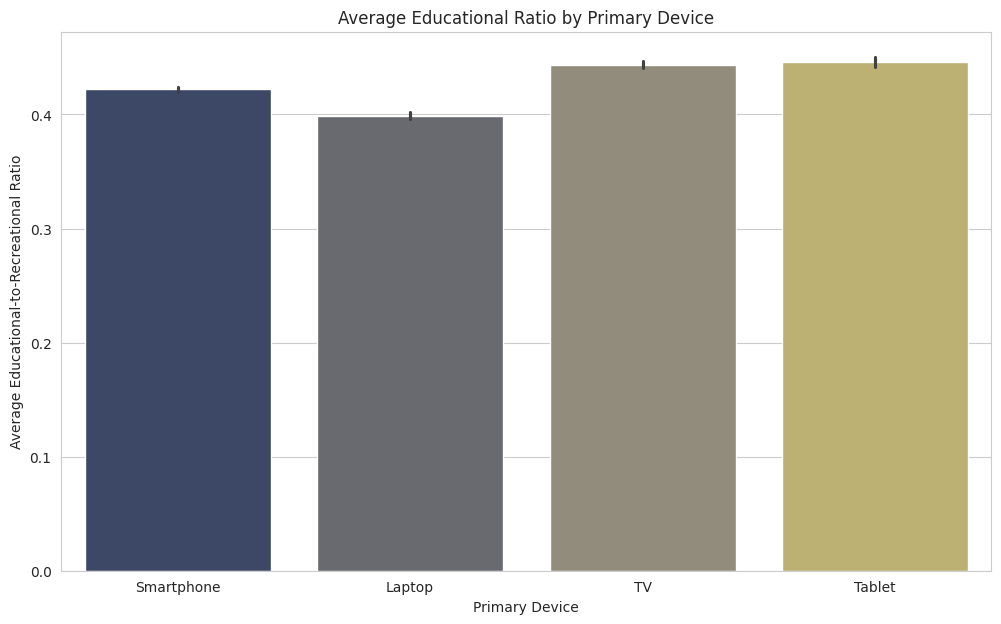

In [24]:
# Bar Chart: Average Educational Ratio by Device
plt.figure(figsize=(12, 7))
sns.barplot(x='Primary_Device', y='Educational_to_Recreational_Ratio', data=df, hue='Primary_Device', palette='cividis', legend=False)
plt.title('Average Educational Ratio by Primary Device')
plt.xlabel('Primary Device')
plt.ylabel('Average Educational-to-Recreational Ratio')
plt.show()

# **Key Observations**
* The average educational-to-recreational ratio varies across different primary devices.
* By comparing the heights of the bars, we can observe which devices are associated with a higher or lower average educational-to-recreational ratio. For example, devices with taller bars indicate a higher proportion of educational content consumption on average.

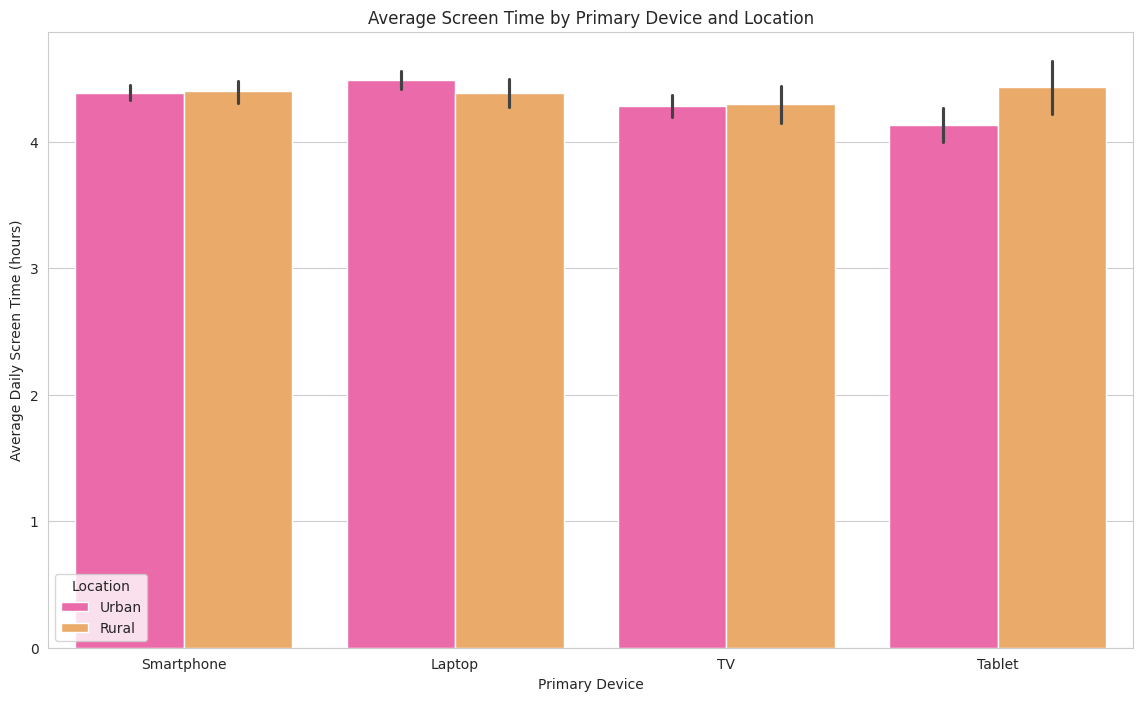

In [25]:
# Bar Chart: Screen Time by Location and Device
plt.figure(figsize=(14, 8))
sns.barplot(x='Primary_Device', y='Avg_Daily_Screen_Time_hr', hue='Urban_or_Rural', data=df, palette='spring')
plt.title('Average Screen Time by Primary Device and Location')
plt.xlabel('Primary Device')
plt.ylabel('Average Daily Screen Time (hours)')
plt.legend(title='Location')
plt.show()

# **Key Observations**
* The average daily screen time varies depending on both the primary device used and the location (Urban or Rural).
* By comparing the heights of the bars for each device and location combination, we can observe which devices are associated with higher or lower average screen times in Urban versus Rural areas.

In [29]:
# Sunburst Plot: Hierarchical Device Usage

# Importing an additional library.
import plotly.express as px
sunburst_df = df.dropna(subset=['Urban_or_Rural', 'Age_Band', 'Primary_Device'])
fig = px.sunburst(sunburst_df, path=['Urban_or_Rural', 'Age_Band', 'Primary_Device'],
                  title='Hierarchical Sunburst of Device Usage by Location and Age')
fig.show()

# **Key Observations**
* The sunburst plot provides a hierarchical view of device usage, starting with location (Urban or Rural), then age band (Child, Pre-Teen, Teenager), and finally the primary device (Laptop, Smartphone, TV, Tablet).
* By clicking on different segments of the sunburst, we can explore the distribution of device usage within specific locations and age groups. This allows for a detailed understanding of how device preferences vary across different demographics.